# Heart Attack Classification with Python

## About this dataset
**Age** : Age of the patient

**Sex** : Sex of the patient

**exang**: exercise induced angina (1 = yes; 0 = no)

**ca**: number of major vessels (0-3)

**cp** : Chest Pain type chest pain type


*   **Value 0**: typical angina
*   **Value 1**: atypical angina
*   **Value 2**: non-anginal pain
*   **Value 3**: asymptomatic

**trtbps** : resting blood pressure (in mm Hg)

**chol** : cholestoral in mg/dl fetched via BMI sensor

**fbs** : (fasting blood sugar > 120 mg/dl) (1 = true; 0 = false)

**rest_ecg** : resting electrocardiographic results
*   Value 0: normal
*   Value 1: having ST-T wave abnormality (T wave inversions and/or ST elevation or depression of > 0.05 mV)
*   Value 2: showing probable or definite left ventricular hypertrophy by Estes' criteria

**thalach** : maximum heart rate achieved

**target** : 0= less chance of heart attack 1= more chance of heart attack

## Import Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.tree import plot_tree
import warnings
warnings.filterwarnings("ignore")

## Load Data

In [2]:
df = pd.read_csv("heart.csv")
df.head()

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


## Exploratory Data Analysis
Langkah selanjutnya, mari lakukan eksplorasi data agar mendapatkan informasi lebih banyak dari dataset.

In [3]:
df.shape

(303, 14)

In [4]:
df.drop_duplicates(keep=False,inplace=True)
df.shape

(301, 14)

In [5]:
df.isnull().sum()

age         0
sex         0
cp          0
trtbps      0
chol        0
fbs         0
restecg     0
thalachh    0
exng        0
oldpeak     0
slp         0
caa         0
thall       0
output      0
dtype: int64

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 301 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       301 non-null    int64  
 1   sex       301 non-null    int64  
 2   cp        301 non-null    int64  
 3   trtbps    301 non-null    int64  
 4   chol      301 non-null    int64  
 5   fbs       301 non-null    int64  
 6   restecg   301 non-null    int64  
 7   thalachh  301 non-null    int64  
 8   exng      301 non-null    int64  
 9   oldpeak   301 non-null    float64
 10  slp       301 non-null    int64  
 11  caa       301 non-null    int64  
 12  thall     301 non-null    int64  
 13  output    301 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 35.3 KB


In [7]:
df.columns

Index(['age', 'sex', 'cp', 'trtbps', 'chol', 'fbs', 'restecg', 'thalachh',
       'exng', 'oldpeak', 'slp', 'caa', 'thall', 'output'],
      dtype='object')

In [8]:
column = ['sex', 'cp', 'fbs', 'restecg', 'exng', 'slp', 'caa', 'thall','output']
for i in column:
    print("Count" + " " +i)
    print(df[i].value_counts(),"\n")

Count sex
1    205
0     96
Name: sex, dtype: int64 

Count cp
0    143
2     85
1     50
3     23
Name: cp, dtype: int64 

Count fbs
0    256
1     45
Name: fbs, dtype: int64 

Count restecg
1    150
0    147
2      4
Name: restecg, dtype: int64 

Count exng
0    202
1     99
Name: exng, dtype: int64 

Count slp
2    140
1    140
0     21
Name: slp, dtype: int64 

Count caa
0    175
1     65
2     38
3     20
4      3
Name: caa, dtype: int64 

Count thall
2    164
3    117
1     18
0      2
Name: thall, dtype: int64 

Count output
1    163
0    138
Name: output, dtype: int64 



In [9]:
df.describe()

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
count,301.000000,301.000000,301.000000,301.000000,301.000000,301.000000,301.000000,301.000000,301.000000,301.000000,301.000000,301.000000,301.000000,301.000000
mean,54.475083,0.681063,0.960133,131.581395,246.737542,0.149502,0.524917,149.491694,0.328904,1.046512,1.395349,0.707641,2.315615,0.541528
std,9.013150,0.466841,1.032023,17.588752,51.674503,0.357176,0.526191,22.901618,0.470597,1.161822,0.616316,0.990408,0.613777,0.499102
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,48.000000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.000000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,56.000000,1.000000,1.000000,130.000000,241.000000,0.000000,1.000000,152.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,275.000000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [10]:
sns.set_style("whitegrid")
sns.set_palette("hls")

### Non-Categorical Features

In [11]:
df_output0 = df[df["output"]==0]
df_output1 = df[df["output"]==1]

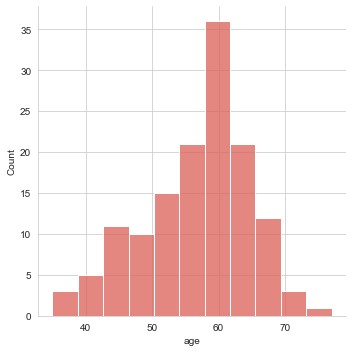

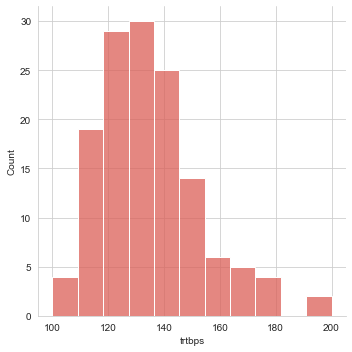

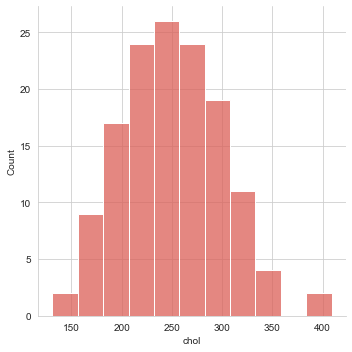

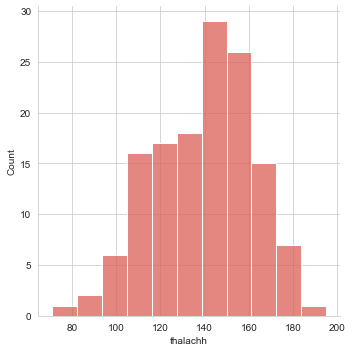

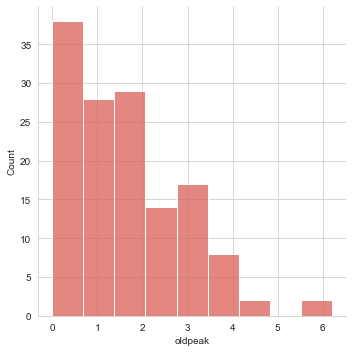

In [12]:
column = ['age','trtbps','chol','thalachh','oldpeak']
for i in column:
    sns.displot(x=i,data=df_output0)
    plt.show()

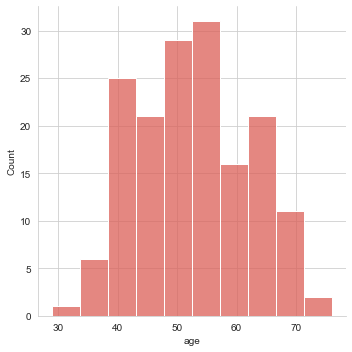

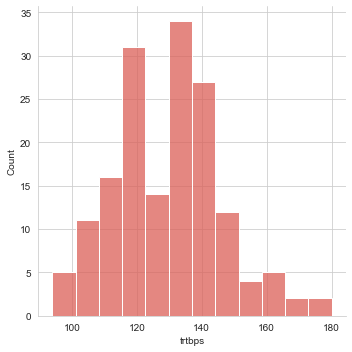

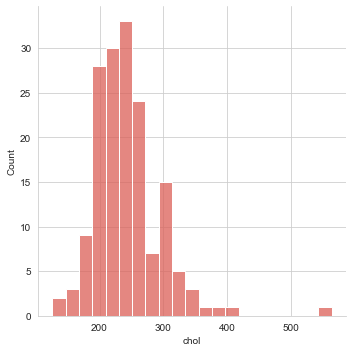

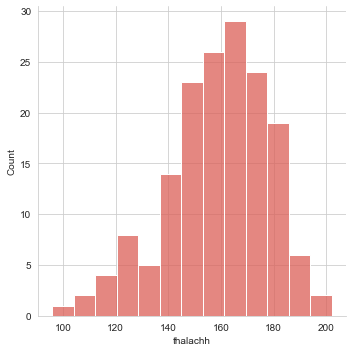

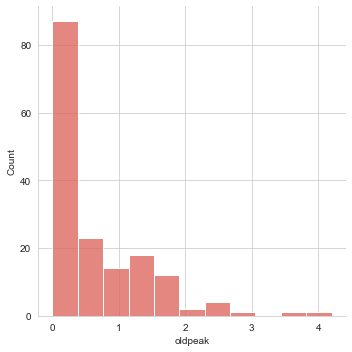

In [13]:
column = ['age','trtbps','chol','thalachh','oldpeak']
for i in column:
    sns.displot(x=i,data=df_output1)
    plt.show()

### Categorical Features

Text(0.5, 1.0, 'Count Heart Attack by Gender')

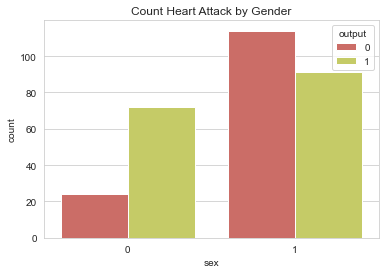

In [14]:
sns.countplot(x="sex",data=df,hue="output").set_title("Count Heart Attack by Gender")

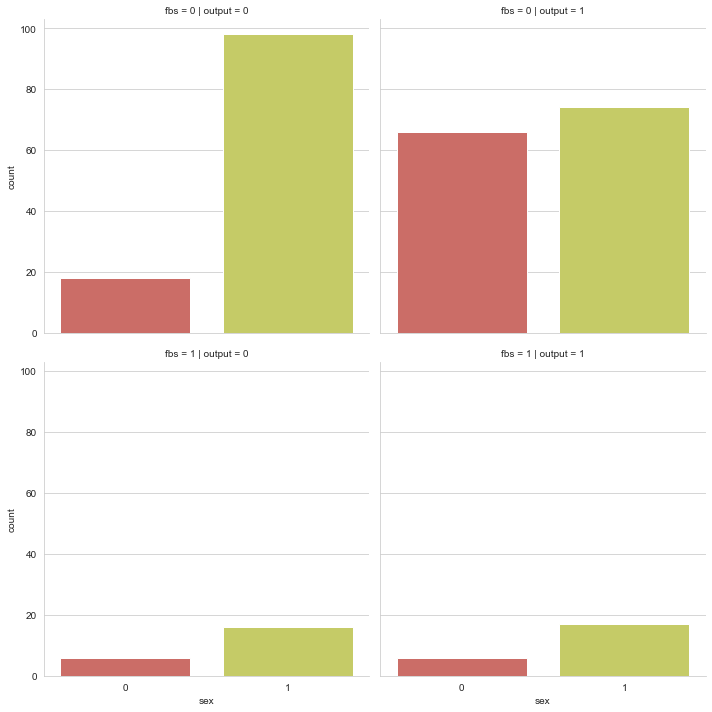

In [15]:
sns.catplot(x="sex",data=df,col="output",row="fbs",kind="count")

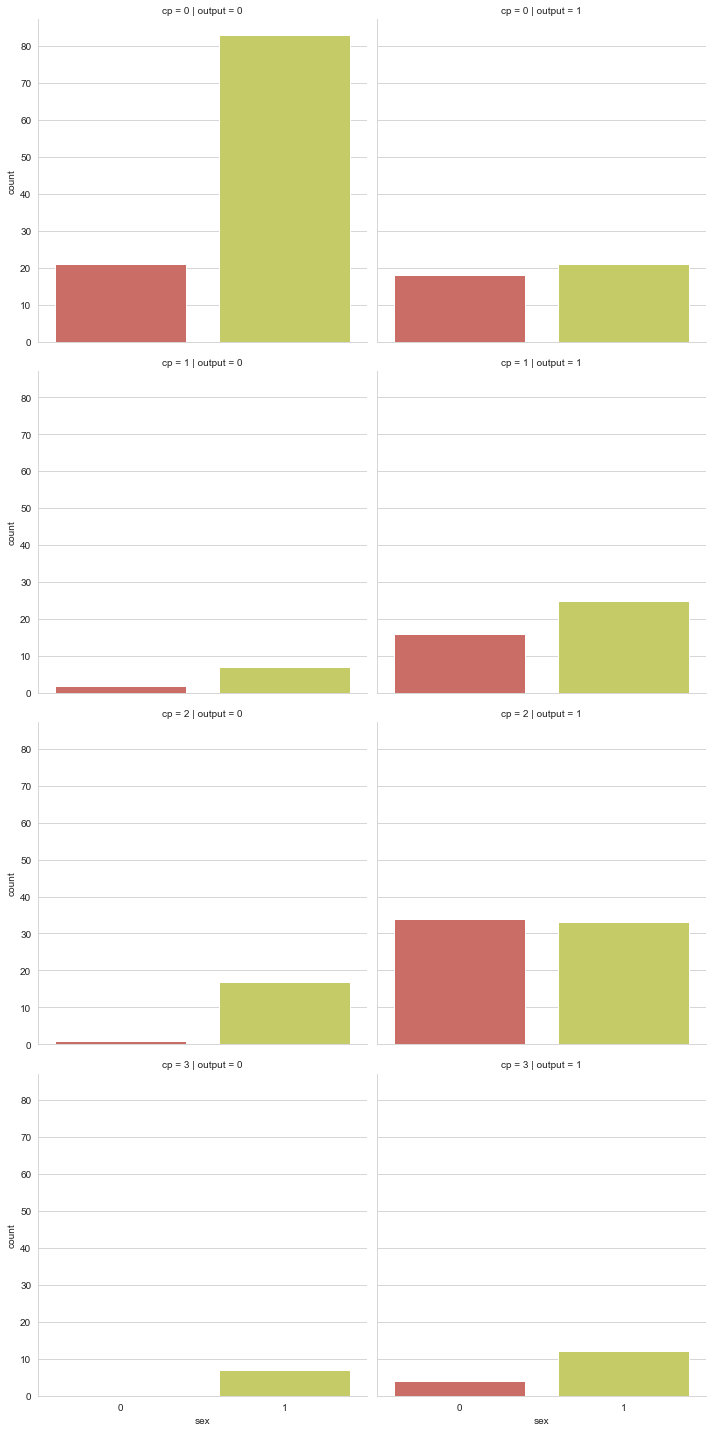

In [16]:
sns.catplot(x="sex",data=df,col="output",row="cp",kind="count")

### Chest Pain Attribute

Text(0.5, 1.0, 'Count Heart Attack by Chest Pain')

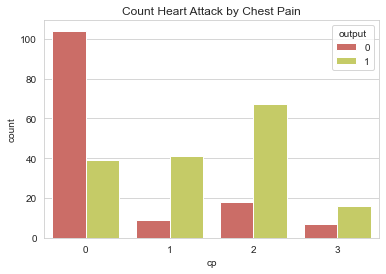

In [17]:
sns.countplot(x="cp",data=df,hue="output").set_title("Count Heart Attack by Chest Pain")

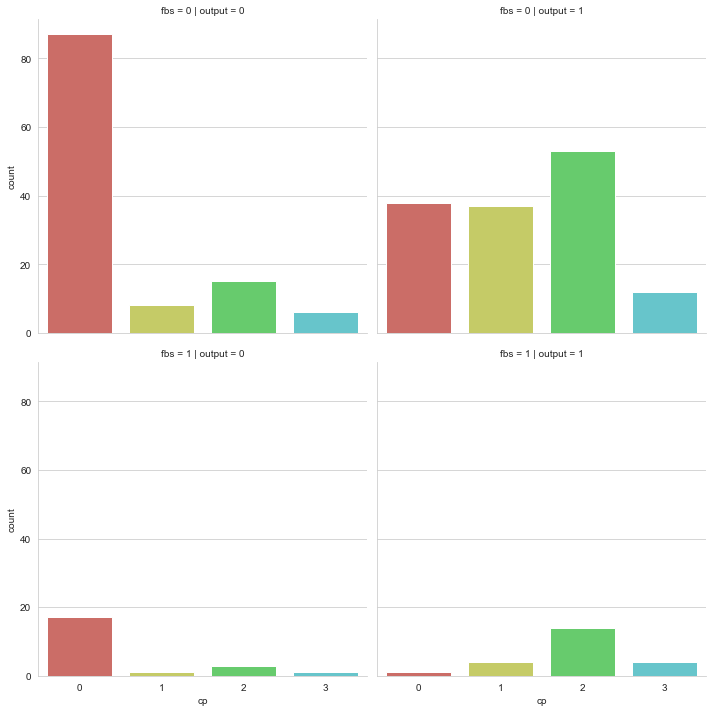

In [18]:
sns.catplot(x="cp",data=df,col="output",row="fbs",kind="count")

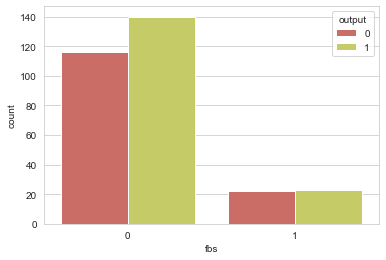

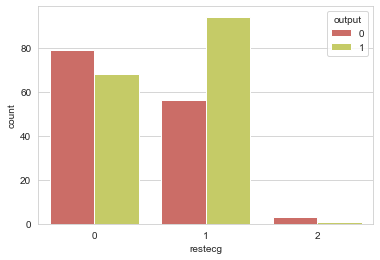

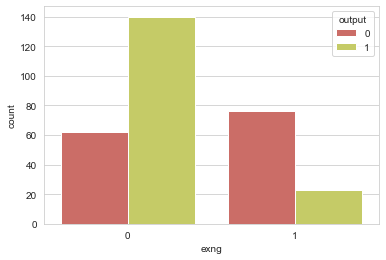

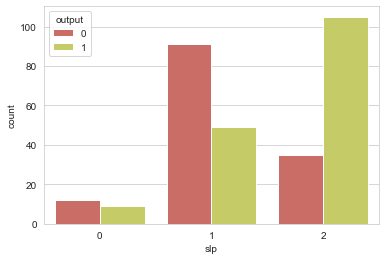

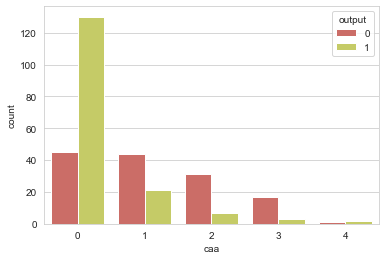

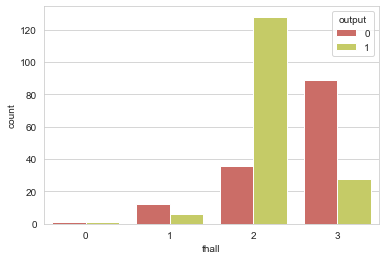

In [19]:
column = ['fbs', 'restecg', 'exng', 'slp', 'caa', 'thall']
for i in column:
    sns.countplot(x=i,data=df,hue="output")
    plt.show()

<AxesSubplot:xlabel='output', ylabel='count'>

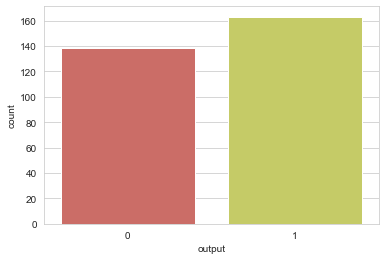

In [20]:
sns.countplot(x="output",data=df)

<AxesSubplot:>

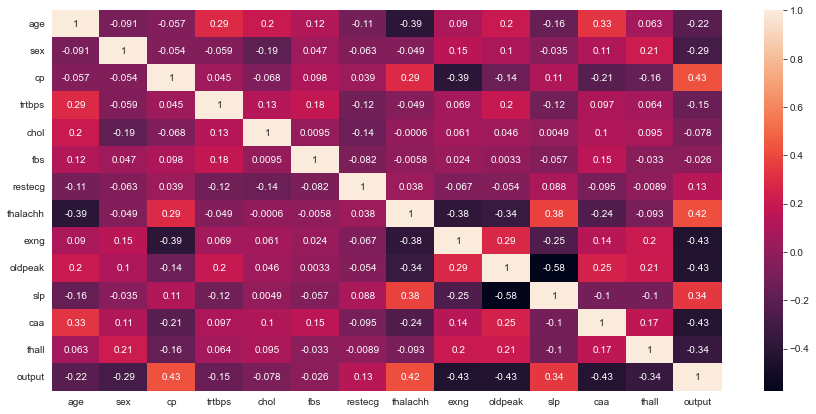

In [21]:
plt.figure(figsize=(15,7))
sns.heatmap(df.corr(),annot=True)

In [22]:
df.corr()["output"].sort_values(ascending=False)

output      1.000000
cp          0.430339
thalachh    0.418146
slp         0.341977
restecg     0.132491
fbs        -0.025594
chol       -0.077575
trtbps     -0.147620
age        -0.217435
sex        -0.286312
thall      -0.342163
caa        -0.427160
oldpeak    -0.427577
exng       -0.434432
Name: output, dtype: float64

### Data Preparation

In [23]:
X = df.drop("output",axis=1)
y = df["output"]

In [24]:
X.head()

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2


In [25]:
y.head()

0    1
1    1
2    1
3    1
4    1
Name: output, dtype: int64

In [26]:
ss = StandardScaler()

In [27]:
X = ss.fit(X).transform(X)

In [28]:
X[0:5]

array([[ 0.94740608,  0.68431914,  1.97986244,  0.76417876, -0.26629029,
         2.38513918, -0.99923977,  0.02223215, -0.70007072,  1.08069584,
        -2.26778684, -0.71568443, -2.14704327],
       [-1.9420717 ,  0.68431914,  1.00927841, -0.09005919,  0.06323992,
        -0.41926275,  0.90437524,  1.64052897, -0.70007072,  2.11527664,
        -2.26778684, -0.71568443, -0.51507351],
       [-1.49753665, -1.46130649,  0.03869438, -0.09005919, -0.82843006,
        -0.41926275, -0.99923977,  0.98446269, -0.70007072,  0.30476024,
         0.98270763, -0.71568443, -0.51507351],
       [ 0.16946975,  0.68431914,  0.03869438, -0.65955116, -0.2081379 ,
        -0.41926275,  0.90437524,  1.2468892 , -0.70007072, -0.21253016,
         0.98270763, -0.71568443, -0.51507351],
       [ 0.28060352, -1.46130649, -0.93188965, -0.65955116,  2.07918945,
        -0.41926275,  0.90437524,  0.59082292,  1.42842712, -0.3849603 ,
         0.98270763, -0.71568443, -0.51507351]])

In [29]:
X_train, X_test, y_train,y_test = train_test_split(X,y,
                                                    test_size = 0.3,
                                                    random_state=42)

### Classifiers

Accuracy Score :  0.7802197802197802 

Classification Report :  
               precision    recall  f1-score   support

           0       0.72      0.83      0.77        41
           1       0.84      0.74      0.79        50

    accuracy                           0.78        91
   macro avg       0.78      0.78      0.78        91
weighted avg       0.79      0.78      0.78        91
 



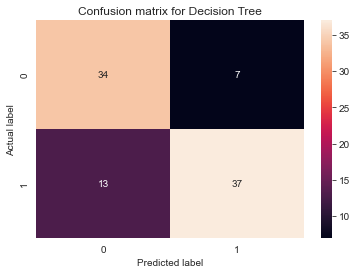

In [30]:
dtree = DecisionTreeClassifier(criterion="entropy", max_depth=9)
model_train = dtree.fit(X_train,y_train)
y_pred = dtree.predict(X_test)
score = accuracy_score(y_test,y_pred)
cm = confusion_matrix(y_test,y_pred)
cr = classification_report(y_test, y_pred)
print("Accuracy Score : ", score, "\n")
print("Classification Report : ","\n",cr, "\n")
cfm = sns.heatmap(pd.DataFrame(cm), annot=True)
plt.title("Confusion matrix for Decision Tree")
plt.ylabel("Actual label")
plt.xlabel("Predicted label")
plt.show()

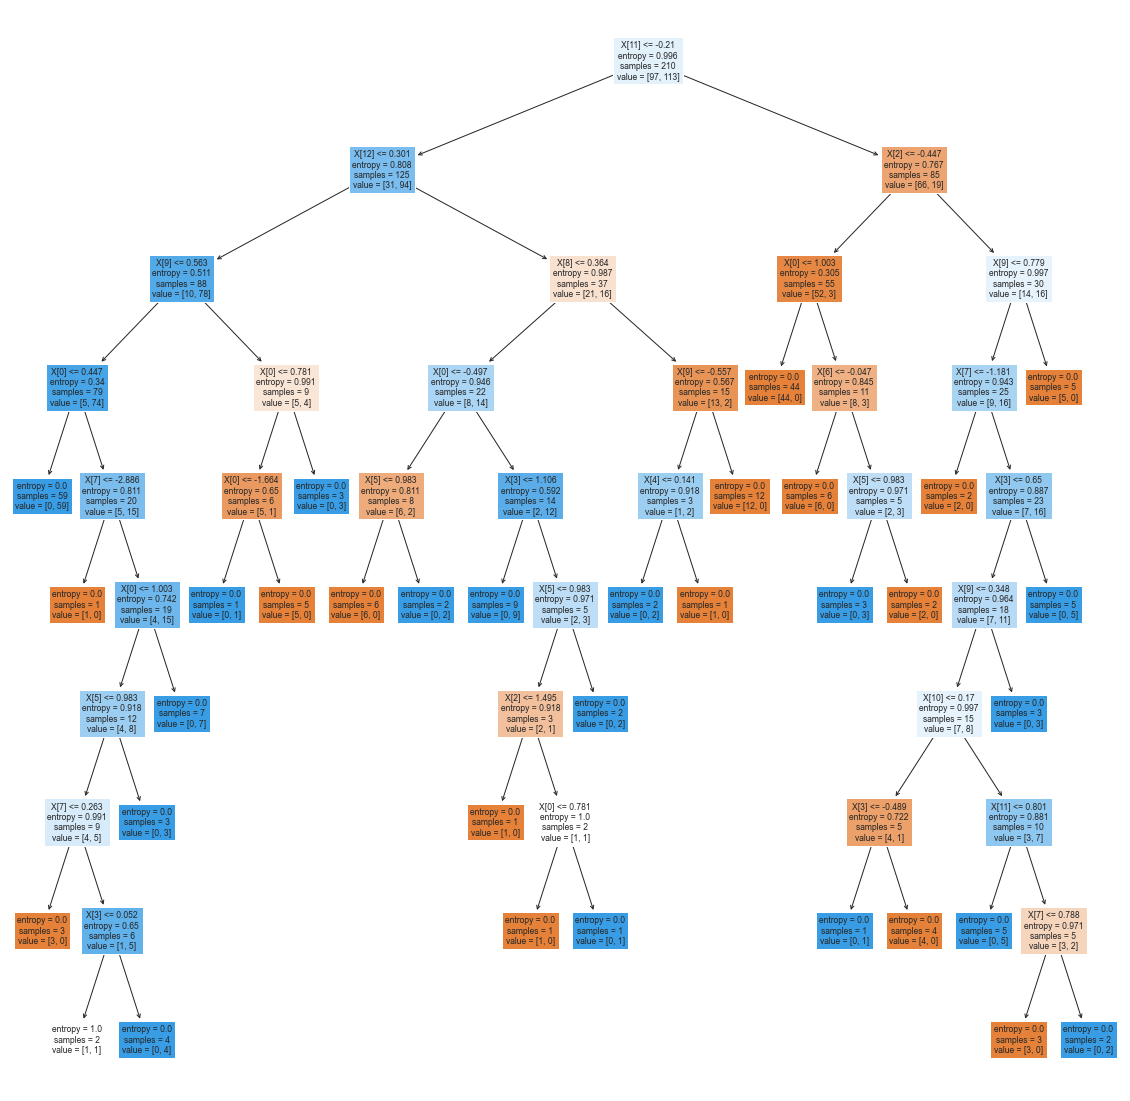

In [31]:
plt.figure(figsize = (20,20))
plot_tree(model_train ,filled=True)
plt.show()

### Finish